# CP2: Exploratory Data Analysis
#### By Logan Larson

In [305]:
import string
import matplotlib.pyplot as plt
import collections
import re
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

In [306]:
# load the text
filename = "AdventuresOfSherlockHolmes.txt"
raw_text = open(filename).read()
print(raw_text[:500])

To Sherlock Holmes she is always THE woman. I have seldom heard
him mention her under any other name. In his eyes she eclipses
and predominates the whole of her sex. It was not that he felt
any emotion akin to love for Irene Adler. All emotions, and that
one particularly, were abhorrent to his cold, precise but
admirably balanced mind. He was, I take it, the most perfect
reasoning and observing machine that the world has seen, but as a
lover he would have placed himself in a false position. He n


#### Character-level Analysis

In [308]:
# create mapping of unique chars to integers
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))

# summarize the loaded data
n_chars = len(raw_text)
n_vocab = len(chars)
print("Number of total characters in document: ", n_chars)
print("Number of unique characters in document: ", n_vocab)

Number of total characters in document:  561209
Number of unique characters in document:  78


#### Word-level Analysis

In [309]:
words = raw_text.split()
print('Number of total words in document: %d' % len(words))
print('Number of unique words in document: %d' % len(set(words)))

Number of total words in document: 104340
Number of unique words in document: 14633


In [310]:
# remove punctuation from each token
table = str.maketrans('', '', string.punctuation)
words = [w.translate(table) for w in words]

# remove remaining tokens that are not alphabetic
words = [word for word in words if word.isalpha()]

print('Number of unique words after removing punctuation: %d' % len(set(words)))

Number of unique words after removing punctuation: 8897


#### WordClouds

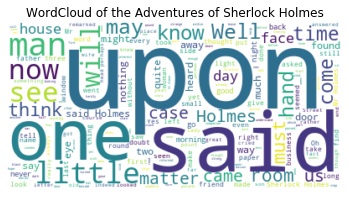

In [312]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color='white').generate(raw_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('WordCloud of the Adventures of Sherlock Holmes')
plt.axis('off')
plt.show()

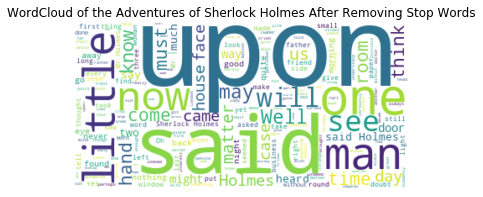

In [313]:
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(raw_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('WordCloud of the Adventures of Sherlock Holmes After Removing Stop Words')
plt.axis("off")
plt.show()

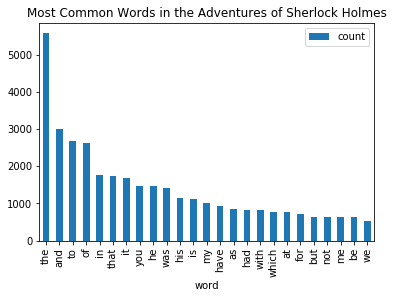

In [314]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(words, 25)
freq = pd.DataFrame.from_records(common_words, columns=['word', 'count']).set_index('word')
freq.plot(kind='bar', title='Most Common Words in the Adventures of Sherlock Holmes')

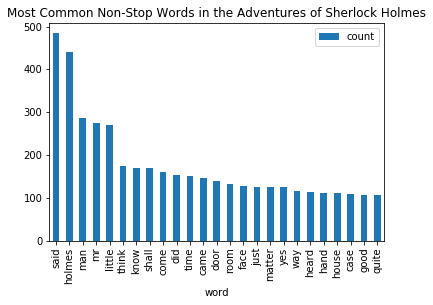

In [316]:
#top unigrams after removing stopwords 

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(words, 25)
freq = pd.DataFrame.from_records(common_words, columns=['word', 'count']).set_index('word')
freq.plot(kind='bar', title='Most Common Non-Stop Words in the Adventures of Sherlock Holmes')

In [190]:
def tokenize(string):
    return re.findall(r'\w+', string.lower())


def count_ngrams(lines, min_length=2, max_length=6):
    lengths = range(min_length, max_length + 1)
    ngrams = {length: collections.Counter() for length in lengths}
    queue = collections.deque(maxlen=max_length)

    # Helper function to add n-grams at start of current queue to dict
    def add_queue():
        current = tuple(queue)
        for length in lengths:
            if len(current) >= length:
                ngrams[length][current[:length]] += 1

    # Loop through all lines and words and add n-grams to dict
    for line in lines:
        for word in tokenize(line):
            queue.append(word)
            if len(queue) >= max_length:
                add_queue()

    # Make sure we get the n-grams at the tail end of the queue
    while len(queue) > min_length:
        queue.popleft()
        add_queue()

    return ngrams


def print_most_frequent(ngrams, num=10):
    """Print num most common n-grams of each length in n-grams dict."""
    for n in sorted(ngrams):
        print('----- {} most common {}-grams -----'.format(num, n))
        for gram, count in ngrams[n].most_common(num):
            print('"{0}" used {1} times'.format(' '.join(gram), count))
        print('')

#### N-gram Analysis

In [206]:
raw_text = raw_text.lower()
tok = tokenize(raw_text)
counted = count_ngrams(tok)
print_most_frequent(counted, 20)

----- 20 most common 2-grams -----
"of the" used 703 times
"in the" used 506 times
"it is" used 334 times
"to the" used 304 times
"i have" used 300 times
"it was" used 279 times
"that i" used 257 times
"at the" used 237 times
"and i" used 217 times
"to be" used 199 times
"and the" used 198 times
"upon the" used 196 times
"with a" used 186 times
"i was" used 186 times
"i am" used 182 times
"i had" used 168 times
"of a" used 168 times
"was a" used 160 times
"that he" used 154 times
"he was" used 152 times

----- 20 most common 3-grams -----
"one of the" used 50 times
"it is a" used 46 times
"i think that" used 46 times
"it was a" used 45 times
"that it was" used 38 times
"out of the" used 36 times
"that i have" used 35 times
"i do not" used 34 times
"that it is" used 34 times
"there was a" used 34 times
"that he had" used 30 times
"that he was" used 30 times
"that i was" used 28 times
"lord st simon" used 28 times
"that i had" used 27 times
"i have no" used 27 times
"in front of" used 27

In [293]:
Story1 = 'ASH_1_ScandalInBohemia.txt'
Story2 = 'ASH_2_RedHeadedLeague.txt'
Story3 = 'ASH_3_CaseOfIdentity.txt'
Story4 = 'ASH_4_BoscombeValleyMystery.txt'
Story5 = 'ASH_5_FiveOrangePips.txt'
Story6 = 'ASH_6_ManWithTheTwistedLip.txt'
Story7 = 'ASH_7_AdventureOfBlueCarbuncle.txt'
Story8 = 'ASH_8_AdventureOfTheSpeckledBand.txt'
Story9 = 'ASH_9_AdventureOfEngineersThumb.txt'
Story10 = 'ASH_10_AdventureOfTheNobleBachelor.txt'
Story11 = 'ASH_11_AdventureOfTheBerylCoronet.txt'
Story12 = 'ASH_12_AdventureOfCopperBeeches.txt'
One_ScandalInBohemia = open(Story1).read()
Two_RedHeadedLeague = open(Story2).read()
Three_CaseOfIdentity = open(Story3).read()
Four_BoscombeValleyMystery = open(Story4).read()
Five_FiveOrangePips = open(Story5).read()
Six_ManWithTwistedLip = open(Story6).read()
Seven_BlueCarbuncle = open(Story7).read()
Eight_SpeckledBand = open(Story8).read()
Nine_EngineersThumb = open(Story9).read()
Ten_NobleBachelor = open(Story10).read()
Eleven_BerylCoronet = open(Story11).read()
Twelve_CopperBeeches = open(Story12).read()

In [294]:
def preprocess(Text):
    Text = Text.lower()
    Text = Text.replace('\n', "")
    Text = Text.replace("(<br/>)", "")
    Text = Text.replace('(<a).*(>).*(</a>)', '')
    Text = Text.replace('(&amp)', '')
    Text = Text.replace('(&gt)', '')
    Text = Text.replace('(&lt)', '')
    Text = Text.replace('(\xa0)', ' ')  
    return Text

One_ScandalInBohemia = preprocess(One_ScandalInBohemia)
Two_RedHeadedLeague = preprocess(Two_RedHeadedLeague)
Three_CaseOfIdentity = preprocess(Three_CaseOfIdentity)
Four_BoscombeValleyMystery = preprocess(Four_BoscombeValleyMystery)
Five_FiveOrangePips = preprocess(Five_FiveOrangePips)
Six_ManWithTwistedLip = preprocess(Six_ManWithTwistedLip)
Seven_BlueCarbuncle = preprocess(Seven_BlueCarbuncle)
Eight_SpeckledBand = preprocess(Eight_SpeckledBand)
Nine_EngineersThumb = preprocess(Nine_EngineersThumb)
Ten_NobleBachelor = preprocess(Ten_NobleBachelor)
Eleven_BerylCoronet = preprocess(Eleven_BerylCoronet)
Twelve_CopperBeeches = preprocess(Twelve_CopperBeeches)

In [295]:
Titles=['A Scandal In Bohemia', 'The Red Headed League', 'Case Of Identity', 'Boscombe Valley Mystery', 'The Five Orange Pips', 'The Man With the Twisted Lip', 'Adventure of the Blue Carbuncle', 'Adventure of the Speckled Band', 'Adventure of the Engineers Thumb', 'Adventure of the Noble Bachelor', 'Adventure of the Beryl Coronet', 'Adventure of the Copper Beeches']
textfiles = [One_ScandalInBohemia, Two_RedHeadedLeague, Three_CaseOfIdentity, Four_BoscombeValleyMystery, Five_FiveOrangePips, Six_ManWithTwistedLip, Seven_BlueCarbuncle, Eight_SpeckledBand, Nine_EngineersThumb, Ten_NobleBachelor, Eleven_BerylCoronet, Twelve_CopperBeeches]

In [299]:
ASH = {'Title': Titles, 'Text': textfiles}
ASH = pd.DataFrame(ASH).set_index('Title')
ASH

,Text
Title,
A Scandal In Bohemia,to sherlock holmes she is always _the_ woman. ...
The Red Headed League,"i had called upon my friend, mr. sherlock hol..."
Case Of Identity,"“my dear fellow,” said sherlock holmes as we s..."
Boscombe Valley Mystery,"we were seated at breakfast one morning, my wi..."
The Five Orange Pips,when i glance over my notes and records of the...
The Man With the Twisted Lip,"isa whitney, brother of the late elias whitney..."
Adventure of the Blue Carbuncle,i had called upon my friend sherlock holmes up...
Adventure of the Speckled Band,on glancing over my notes of the seventy odd c...
Adventure of the Engineers Thumb,of all the problems which have been submitted ...


In [302]:
def doc_stats(text):
    # create mapping of unique chars to integers
    chars = sorted(list(set(text)))
    char_to_int = dict((c, i) for i, c in enumerate(chars))
    # summarize the loaded data
    n_chars = len(text)
    n_vocab = len(chars)
    print("Number of total characters: ", n_chars)
    print("Number of unique characters: ", n_vocab)
    
    words = text.split()
    # remove punctuation from each token
    table = str.maketrans('', '', string.punctuation)
    words = [w.translate(table) for w in words]

    # remove remaining tokens that are not alphabetic
    words = [word for word in words if word.isalpha()]
    
    print('Number of total words: %d' % len(words))
    print('Number of unique words after removing punctuation: %d' % len(set(words)))
    
    wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    

<built-in method index of str object at 0x13ce17000>
Number of total characters:  45416
Number of unique characters:  47
Number of total words: 7301
Number of unique words after removing punctuation: 2089


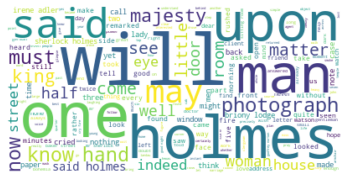

<built-in method index of str object at 0x13cf5b000>
Number of total characters:  45416
Number of unique characters:  47
Number of total words: 7301
Number of unique words after removing punctuation: 2089


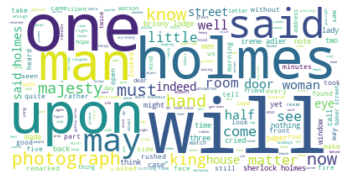

<built-in method index of str object at 0x1359b7000>
Number of total characters:  45416
Number of unique characters:  47
Number of total words: 7301
Number of unique words after removing punctuation: 2089


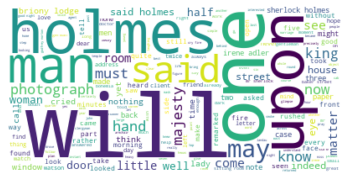

<built-in method index of str object at 0x12dde2000>
Number of total characters:  45416
Number of unique characters:  47
Number of total words: 7301
Number of unique words after removing punctuation: 2089


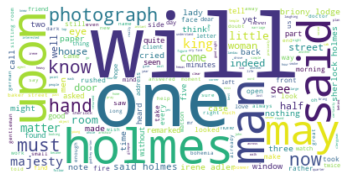

<built-in method index of str object at 0x10ac8a000>
Number of total characters:  45416
Number of unique characters:  47
Number of total words: 7301
Number of unique words after removing punctuation: 2089


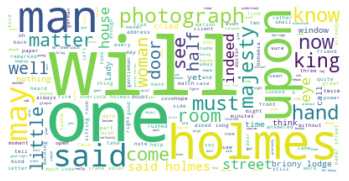

<built-in method index of str object at 0x135a1a000>
Number of total characters:  45416
Number of unique characters:  47
Number of total words: 7301
Number of unique words after removing punctuation: 2089


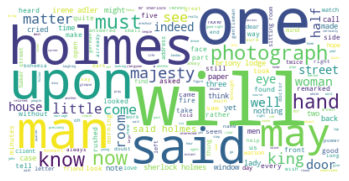

<built-in method index of str object at 0x13c638000>
Number of total characters:  45416
Number of unique characters:  47
Number of total words: 7301
Number of unique words after removing punctuation: 2089


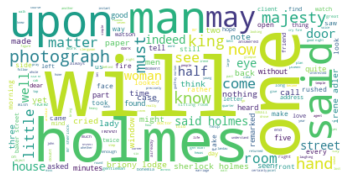

<built-in method index of str object at 0x13bb98000>
Number of total characters:  45416
Number of unique characters:  47
Number of total words: 7301
Number of unique words after removing punctuation: 2089


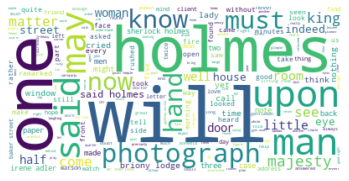

<built-in method index of str object at 0x13c44b000>
Number of total characters:  45416
Number of unique characters:  47
Number of total words: 7301
Number of unique words after removing punctuation: 2089


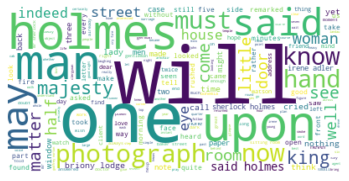

<built-in method index of str object at 0x12de56000>
Number of total characters:  45416
Number of unique characters:  47
Number of total words: 7301
Number of unique words after removing punctuation: 2089


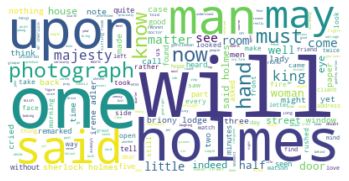

<built-in method index of str object at 0x13bdbd000>
Number of total characters:  45416
Number of unique characters:  47
Number of total words: 7301
Number of unique words after removing punctuation: 2089


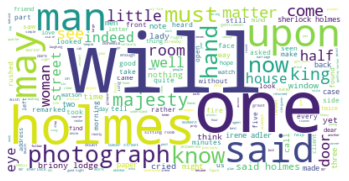

<built-in method index of str object at 0x13d801000>
Number of total characters:  45416
Number of unique characters:  47
Number of total words: 7301
Number of unique words after removing punctuation: 2089


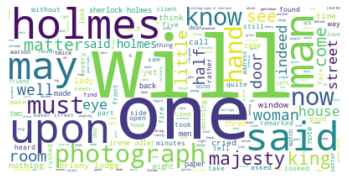

Title
A Scandal In Bohemia                None
The Red Headed League               None
Case Of Identity                    None
Boscombe Valley Mystery             None
The Five Orange Pips                None
The Man With the Twisted Lip        None
Adventure of the Blue Carbuncle     None
Adventure of the Speckled Band      None
Adventure of the Engineers Thumb    None
Adventure of the Noble Bachelor     None
Adventure of the Beryl Coronet      None
Adventure of the Copper Beeches     None
Name: Text, dtype: object

In [301]:
ASH.Text.apply(doc_stats)